In [2]:
from keras.models import load_model
import cv2 as cv
from PIL import Image
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Explainers:
import shap

In [4]:
model = load_model('my_path/Models/cnn.mdl_wts.hdf5')
height = 50
width = 50
my_information = {
                0: '20km', 1: '30km', 
                2: '50km', 3: '60km', 
                4: '70km', 5: '80km',
                6: '80km_crossed', 7: '100km',
                8: '120km', 9: 'no_overtaking', 
                10: 'no_overtaking_for_tracks', 11: 'crossroads',
                12: 'priority_roads', 13: 'give_way', 
                14: 'stop', 15: 'road_closed', 
                16: 'no_tractor', 17: 'no_entry',
                18: 'attention', 19: 'sharp_curve_left', 
                20: 'sharp_curve_right', 21: 'zigzag_left',
                22: 'rough_road', 23: 'car_skid',
                24: 'road_narrowing_right', 25: 'road_works', 
                26: 'traffic_light', 27: 'crosswalk', 
                28: 'children_crossing', 29: 'bike_road',
                30: 'snow', 31: 'wild_animal', 
                32: 'derestriction', 33: 'mandatory_right_turn', 
                34: 'mandatory_left_turn', 35: 'mandatory_straight_ahead',
                36: 'mandatory_straight_ahead_or_turning_right', 37: 'mandatory_straight_ahead_or_turning_left', 
                38: 'mandatory_passing_right', 39: 'mandatory_passing_left', 
                40: 'mandatory_direction_of_the_roundabout', 41: 'derestriction_of_overtaking', 
                42: 'derestriction_of_overtaking_for_tracks'}

In [9]:
data=[]
image=cv.imread('my_path/Imagery_data_GTSRB/Test/00573.png')
imageRGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)
img = Image.fromarray(imageRGB)
image_from_array = img
size_image = image_from_array.resize((height, width))
data.append(np.array(size_image))
X_test=np.array(data)
X_test = X_test.astype('float32')/255 
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
X_test.shape

1/1 [==============================] - 0s 14ms/step


(1, 50, 50, 3)

1/1 [==============================] - 0s 13ms/step


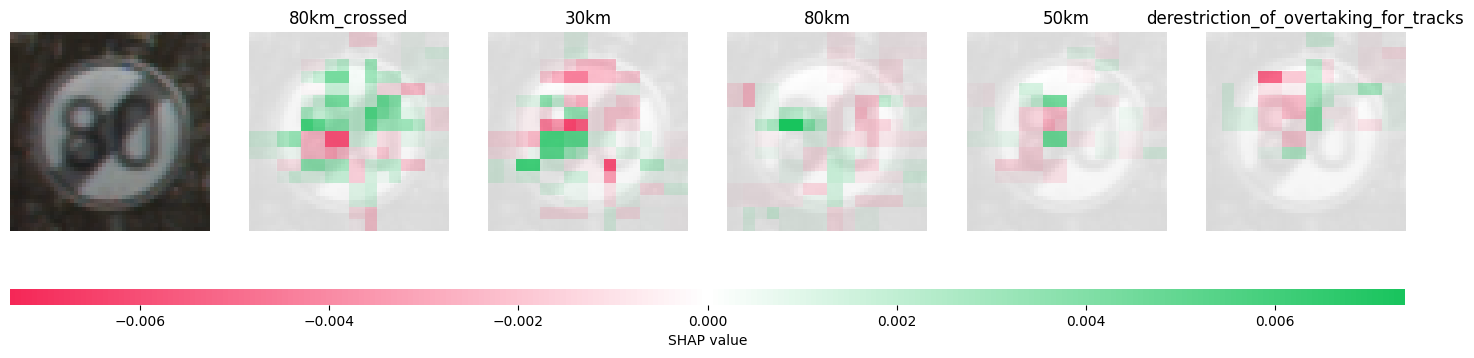

In [10]:
# based on example: https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/image.html
# use class names as a vectorized mapping function from ids to names
class_names = list(my_information.values())

# define a masker that is used to mask out partitions of the input image, this one uses a blurred background
masker = shap.maskers.Image("inpaint_telea", X_test[0].shape)

# By default the Partition explainer is used for all  partition explainer
explainer = shap.Explainer(model, masker, output_names=class_names)
colors = []
for l in np.linspace(1,0,100):
	colors.append((245/255,39/255,87/255,l))
for l in np.linspace(0,1,100):
	colors.append((24/255,196/255,93/255,l))
cm = LinearSegmentedColormap.from_list("shap", colors)
# here we use 2000 evaluations of the underlying model to estimate the SHAP values
i=0
ind = (-model.predict(X_test[i].reshape(1,50,50,3))[0]).argsort()
shap_values = explainer(X_test[i:i+1]*255, max_evals=2000, batch_size=500, outputs=ind[:5])
shap.image_plot(shap_values, pixel_values=X_test[i:i+1], cmap=cm,show=False)
    #plt.savefig("shap_{}.png".format(i))